In [2]:
X_train = np.array([[158,64],[170,86],[183,84],[191,80],[155,49],[163,59],[180,67],[158,54],[170,67]])

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
X_train

array([[158,  64],
       [170,  86],
       [183,  84],
       [191,  80],
       [155,  49],
       [163,  59],
       [180,  67],
       [158,  54],
       [170,  67]])

In [4]:
y_train = ['male','male','male','male','female','female','female','female','female']

In [5]:
y_train

['male',
 'male',
 'male',
 'male',
 'female',
 'female',
 'female',
 'female',
 'female']

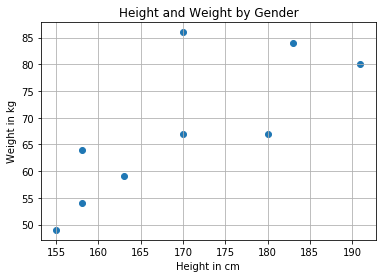

In [6]:
plt.title('Height and Weight by Gender')
plt.grid(True)
plt.xlabel('Height in cm')
plt.ylabel('Weight in kg')
plt.scatter(X_train[:,0],X_train[:,1]);

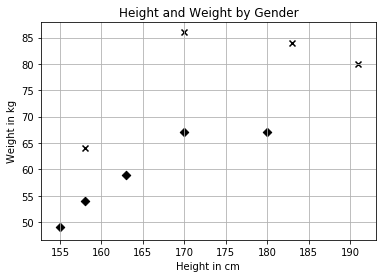

In [7]:
plt.title('Height and Weight by Gender')
plt.grid(True)
plt.xlabel('Height in cm')
plt.ylabel('Weight in kg')
for i,x in enumerate(X_train):
    plt.scatter(x[0],x[1],c='k',marker='x' if y_train[i]=='male' else 'D')

In [8]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.neighbors import KNeighborsClassifier

In [9]:
lb = LabelBinarizer()
y_train_binarized = lb.fit_transform(y_train)

In [10]:
y_train_binarized

array([[1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0]])

In [11]:
y_train_binarized = y_train_binarized.reshape(-1)
y_train_binarized

array([1, 1, 1, 1, 0, 0, 0, 0, 0])

In [38]:
clt = KNeighborsClassifier(n_neighbors=3)
clt.fit(X_train,y_train_binarized)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [55]:
X_test = np.array([[168,65],[180,96],[160,52],[169,67]])
y_test = ['male','male','female','female']
y_test_binarized = lb.transform(y_test)
predicted_y_test_binarized = clt.predict(X_test)
predicted_y_test = lb.inverse_transform(predicted_y_test_binarized)

In [56]:
predicted_y_test

array(['female', 'male', 'female', 'female'], dtype='<U6')

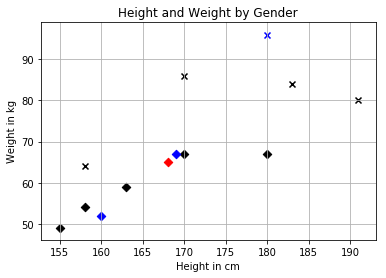

In [61]:
plt.title('Height and Weight by Gender')
plt.grid(True)
plt.xlabel('Height in cm')
plt.ylabel('Weight in kg')
for i,x in enumerate(X_train):
    plt.scatter(x[0],x[1],c='k',marker='x' if y_train[i]=='male' else 'D')
for i,x in enumerate(X_test):
    if predicted_y_test[i]==y_test[i]:
        plt.scatter(x[0],x[1],c='b',marker='x' if predicted_y_test[i]=='male'else 'D')
    else:
        plt.scatter(x[0],x[1],c='r',marker='x' if predicted_y_test[i]=='male'else 'D')